In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.models import ResNet50_Weights
import spacy
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import os, io, json
from PIL import Image
import torchvision.transforms as transforms

In [2]:
images_dir = "../datasets/AVA_dataset/images/images"
captions_file_full = "../datasets/AVA-Captions/AVA_Comments_Full.txt"

In [14]:
with open(captions_file_full, 'r') as temp_f:
    col_count = [len(l.split("#")) for l in temp_f.readlines()]

column_names = [i for i in range(0, max(col_count))]

In [21]:

df_csv = pd.read_csv(captions_file_full, delimiter="#", header=None, names=column_names, dtype="string")

In [22]:
df_csv.head()

,0,1,2,3,4,5,6,7,8,9,...,441,442,443,444,445,446,447,448,449,450
0,1,953619,"Lovely, magical. Lots of dandelion shots in th...",Lovely. Very ethereal.,"Very pretty, and Ursula like.",<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,2,953958,4.6984? You're kidding me!,I like this so much!,more geometry than any man has a right to.,Wonderfully refined. Reminds me totally of an ...,Lovely. My top pick 10,a magical mystery ... absentmindedness can be ...,This is special.,Natures paint brush has finished another maste...,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,3,954184,Quite underrated I though. I enjoyed it :),He sure does look like the puffed up king of t...,Great lighting on this bird.,:),"Ha! You know, when I saw this I had this nagg...",How cool is this? I love the angle which you ...,"That was my college nickname! but seriously, g...","Nice dark tones, i like it.",...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,4,954113,They look like spectators :-),This has got some great contrast and tones. An...,You made a great decision by going with B&W wi...,"I really like this, The light off the ??weeds?...",<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,5,953980,I feel as if a deeper DOF would've worked bett...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [35]:
i = Image.open(os.path.join(images_dir, str.strip(df_csv[1][98]) + ".jpg")).convert("RGB")

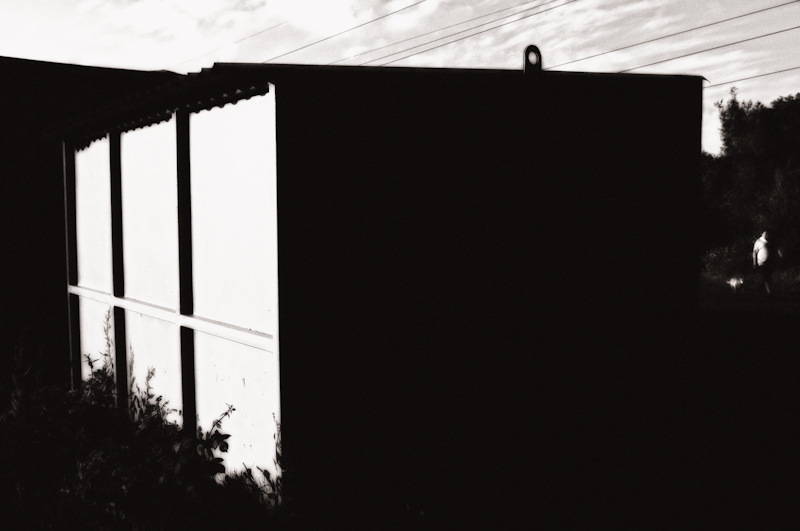

In [36]:
display(i)

In [3]:
#images_dir = "../datasets/AVA_dataset/images/images"
captions_file_cleaned = "../datasets/AVA-Captions/CLEAN_AVA_FULL_COMMENTS.json"

In [46]:

df = pd.read_json(captions_file_cleaned, lines=True)

In [47]:
df.head()

,images,dataset
0,"[{'filepath': '', 'sentids': '', 'filename': '...",AVA


In [4]:
with io.open(captions_file_cleaned, 'r', encoding = 'utf-8') as f:
    database = json.load(f)

In [8]:
db = pd.DataFrame.from_dict(database, orient='index')

In [6]:
db.head()

,0,1,2,3,4,5,6,7,8,9,...,253900,253901,253902,253903,253904,253905,253906,253907,253908,253909
images,"{'filepath': '', 'sentids': '', 'filename': '9...","{'filepath': '', 'sentids': '', 'filename': '9...","{'filepath': '', 'sentids': '', 'filename': '9...","{'filepath': '', 'sentids': '', 'filename': '9...","{'filepath': '', 'sentids': '', 'filename': '9...","{'filepath': '', 'sentids': '', 'filename': '9...","{'filepath': '', 'sentids': '', 'filename': '9...","{'filepath': '', 'sentids': '', 'filename': '9...","{'filepath': '', 'sentids': '', 'filename': '9...","{'filepath': '', 'sentids': '', 'filename': '9...",...,"{'filepath': '', 'sentids': '', 'filename': '5...","{'filepath': '', 'sentids': '', 'filename': '5...","{'filepath': '', 'sentids': '', 'filename': '5...","{'filepath': '', 'sentids': '', 'filename': '5...","{'filepath': '', 'sentids': '', 'filename': '5...","{'filepath': '', 'sentids': '', 'filename': '5...","{'filepath': '', 'sentids': '', 'filename': '5...","{'filepath': '', 'sentids': '', 'filename': '5...","{'filepath': '', 'sentids': '', 'filename': '5...","{'filepath': '', 'sentids': '', 'filename': '5..."
dataset,A,V,A,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [11]:
len(db.columns)

253910

In [61]:
dict_list = []

for i in range(len(db.columns)):
    dict_list.append(db[i]['images'])

In [63]:
dataframe = pd.DataFrame(dict_list)

In [64]:
dataframe.head()

,filepath,sentids,filename,imgid,split,sentences,cocoid
0,,,953619.jpg,953619,train,"[{'tokens': ['lovely', 'magical', 'lots', 'of'...",953619
1,,,953958.jpg,953958,train,"[{'tokens': ['you're', 'kidding', 'me'], 'raw'...",953958
2,,,954184.jpg,954184,train,"[{'tokens': ['quite', 'underrated', 'i', 'thou...",954184
3,,,954113.jpg,954113,train,"[{'tokens': ['they', 'look', 'like', 'spectato...",954113
4,,,953980.jpg,953980,train,"[{'tokens': ['i', 'feel', 'as', 'if', 'a', 'de...",953980
